# Mobile 고객 이탈 분석

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head(20)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1
5,1,119591,0,43,231309.0,714,1,very_sat,considering,0
6,1,99548,235,0,238561.0,294,6,very_unsat,actively_looking_into_it,1
7,1,63338,50,57,394791.0,362,1,sat,no,0
8,1,133496,163,11,166179.0,864,5,NaN,actively_looking_into_it,1
9,1,155145,29,18,717451.0,671,4,unsat,considering,0


In [3]:
mobile.isnull().sum()

COLLEGE                         0
INCOME                          0
OVERAGE                         0
LEFTOVER                        0
HOUSE                         215
HANDSET_PRICE                   0
AVERAGE_CALL_DURATION           0
REPORTED_SATISFACTION          38
CONSIDERING_CHANGE_OF_PLAN      0
CHURN                           0
dtype: int64

* 결측치는 HOUSE (집가격,달러) , REPORTED_SATISFACTION (만족도설문,5) 

|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 가설1 : 월 초과사용 시간(숫자)에 따라 이탈여부 차이가 있다.

* 가설2 : 핸드폰 가격(숫자)에 따라 이탈여부 차이가 있다.

* 가설3 : 연 수입액(숫자)에 따라 이탈여부 차이가 있다.

* 가설4 : 대학졸업 여부(범주)에 따라 이탈여부 차이가 있다.

* 가설5 : 만족도(범주)에 따라 이탈여부 차이가 있다.

* 가설6 : 변경 계획 설문(범주)에 따라 이탈여부 차이가 있다.

----

## 2.단변량 분석

### 1) OVERAGE	

① 변수의 비즈니스 의미

* 월 초과사용 시간

② 숫자? 범주?
* 숫자

③ 전처리 사항

* NaN 존재 X , 가변수화 대상 X

④ 기초통계량

In [4]:
mobile['OVERAGE'].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

⑤ 분포


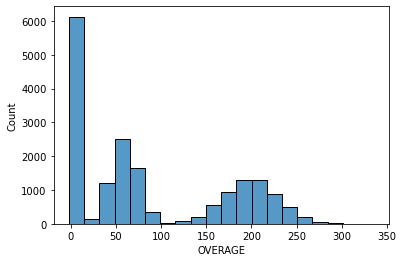

In [5]:
sns.histplot(mobile['OVERAGE'], bins = 20)
plt.show()

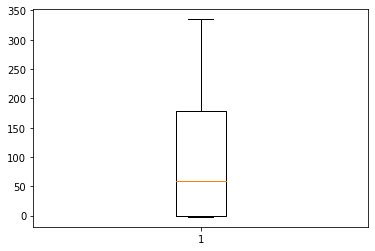

[ 0. -2.]
[179. 335.]


In [6]:
box = plt.boxplot(mobile['OVERAGE'])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리

* 생각보다 초과로 월 초과사용을 하지는 않는다.
* 40후반에서 100까지 사용량이 있다가, 150~250까지 다시 증가했다 감소한다.
* 150분 부터는 본인도 알고도 사용하는 것 같다고 보인다.
  (사용량은 본인이 알텐데 초과로 사용 하는 것을 모르고 저렇게 오래 사용은 안할 것이다.)
  (초과사용량은 본인에게 알림이 갈 것이다.)


⑦ 추가 분석해볼 사항 도출

* 0이후 30-100 과 120-260까지 두 개로 나누어 이탈 분석해볼 필요가 있음.
* 120 이후는 왜 요금제를 높게 안하고 사용하는지가 궁금하므로, 연수입과 연관되어 분석해볼 필요가 있음.

### 2) HANDSET_PRICE	

HANDSET_PRICE

① 변수의 비즈니스 의미
* 핸드폰 가격

② 숫자? 범주?
* 숫자

③ 전처리 사항
* NaN 존재 X, 가변수화 X

④ 기초통계량

In [7]:
mobile['HANDSET_PRICE'].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

⑤ 분포

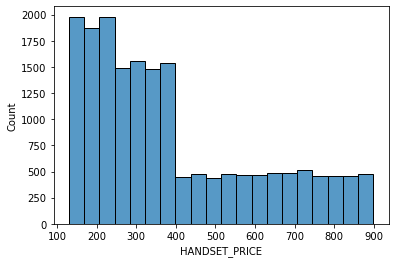

In [9]:
sns.histplot(mobile['HANDSET_PRICE'], bins = 20)
plt.show()

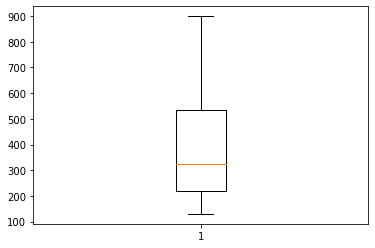

[219. 130.]
[536. 899.]


In [10]:
box = plt.boxplot(mobile['HANDSET_PRICE'])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리
* 핸드폰 가격은 100~400달러 까지 밀집 되어있다.
* 400 달러 이상 비율은 비슷 하다.


⑦ 추가 분석해볼 사항 도출

* 핸드폰 가격과 연 수입액의 관계가 궁금하다.
  (수입액이 적어도 비싼 핸드폰을 사용할지)
  (요즘 시대에 없어서는 안될 필수물품인데, 과시용으로 비싼 것을 살지 궁금하다.)
* 핸드폰 가격이 달라지면 이탈은 안할지 궁금하다.

### 3) INCOME

① 변수의 비즈니스 의미
* 연 수입액

② 숫자? 범주?
* 숫자

③ 전처리 사항
* NaN 존재X , 가변수화 X

④ 기초통계량

In [25]:
mobile['INCOME'].describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

⑤ 분포

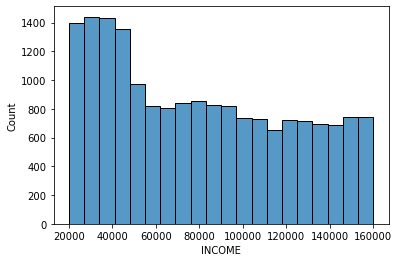

In [26]:
sns.histplot(mobile['INCOME'], bins = 20)
plt.show()

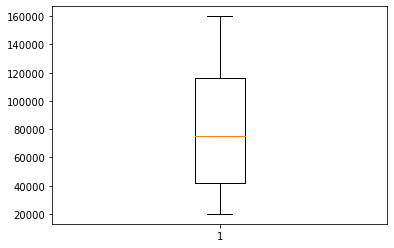

[42151.5 20007. ]
[116082.25 159983.  ]


In [27]:
box = plt.boxplot(mobile['INCOME'])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리
* 2만~5만달러가 아주 많다.
    * 2만달러를 받는 사람들은 대학을 졸업하지 않았을까?
* 생각보다 고액 연봉과 5만달러 이후의 비율이 비슷하다.
    * 고액연봉중에도 대학을 졸업하지 않은 사람이 있을까?

⑦ 추가 분석해볼 사항 도출

* 급여가 높으면 핸드폰 가격이 비싼 것을 사용할까?
* 급여가 높으면 집값도 비쌀까?
* 급여가 높으면 초과사용 시간은 얼마나 될까?

### 4) COLLEGE

① 변수의 비즈니스 의미
* 대학졸업 여부

② 숫자? 범주?
* 범주

③ 전처리 사항
* NAN 존재 X , 가변수화 X

④ 기초통계량

In [28]:
print(mobile['COLLEGE'].value_counts())
print(mobile['COLLEGE'].value_counts()/ len(mobile['COLLEGE']))

1    9049
0    8951
Name: COLLEGE, dtype: int64
1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


⑤ 분포

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


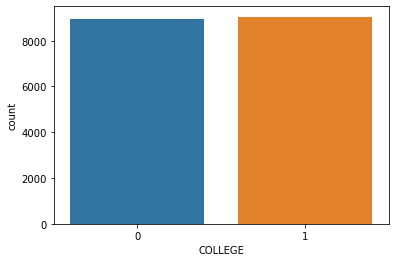

In [29]:
sns.countplot(mobile['COLLEGE'])
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리

* 거의 비슷한 확률이다. 대학 미졸업(49.7%) , 대학 졸업(50.3)
* 대학졸업하지 않은 사람들은 대학을 재학중인지 아니면 대학을 안다니는건지 알 수 없음

⑦ 추가 분석해볼 사항 도출

* 대학 졸업여부에 0인사람들의 연수입을 확인해 재학중인지 아님 안다니는건지 알아 보면 좋을 거 같음

### 5) REPORTED_SATISFACTION	

① 변수의 비즈니스 의미
* 만족도 설문

② 숫자? 범주?
* 범주

③ 전처리 사항

* NaN 38건 존재
* 조치방안 :
    * 삭제 : 38건이라는 건 작게보면 작은 것이고 크게보면 큰 것이므로 삭제는 최후의 방법으로 선택한다.
    * 채우기 :
        * 평균을 사용하면, 38건의 NaN이 모두 같아 결국 평균에 영향을 안 줄 것이다.
        * 직전 행의 값 또는 바로 다음행의 값으로 채우기 한다.

In [48]:
# 직전 행의 값 또는 바로 다음행의 값으로 채우기
# 데이터프레임 복사
mobile_test = mobile.copy()

# 결측치 확인
print(mobile_test.isna().sum())

COLLEGE                         0
INCOME                          0
OVERAGE                         0
LEFTOVER                        0
HOUSE                         215
HANDSET_PRICE                   0
AVERAGE_CALL_DURATION           0
REPORTED_SATISFACTION          38
CONSIDERING_CHANGE_OF_PLAN      0
CHURN                           0
dtype: int64


In [49]:
mobile_test.head(7)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,4,0
1,0,74132,191,43,535092.0,349,2,unsat,2,1
2,1,150419,0,14,204004.0,682,6,unsat,4,0
3,0,159567,0,58,281969.0,634,1,very_unsat,1,0
4,1,23392,0,0,216707.0,233,15,unsat,2,1
5,1,119591,0,43,231309.0,714,1,very_sat,4,0
6,1,99548,235,0,238561.0,294,6,very_unsat,5,1


In [39]:
# 이전값으로 채우기
mobile_test.fillna(method = 'ffill', inplace = True)
mobile_test.head(7)

NameError: name 'mobile_test' is not defined

④ 기초통계량

In [51]:
print(mobile['REPORTED_SATISFACTION'].value_counts())
print(mobile['REPORTED_SATISFACTION'].value_counts()/ len(mobile['REPORTED_SATISFACTION']))

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
very_unsat    0.392889
very_sat      0.253444
unsat         0.199444
avg           0.100333
sat           0.051778
Name: REPORTED_SATISFACTION, dtype: float64


⑤ 분포

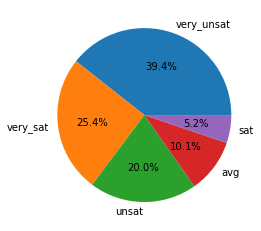

In [38]:
cnt = mobile['REPORTED_SATISFACTION'].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.1f%%')
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리

* 생각보다 불만족의 비율이 높은 편이다. 58%의 비율로 절반 이상 이다.
* 불만족이 많은 것으로 보아 이탈이 많을 것이다.

⑦ 추가 분석해볼 사항 도출

* 불만족에 따른 이탈률 확인
* 비싼 핸드폰을 쓰면 만족도는 어떨지 궁금하다.
* 월 잔여시간이 남는 사람들은 만족하고 있을까 ?

### 6) CONSIDERING_CHANGE_OF_PLAN

① 변수의 비즈니스 의미
* 변경 계획 질문

② 숫자? 범주?
* 범주

③ 전처리 사항

* NaN 존재 X , 가변수화 필요

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


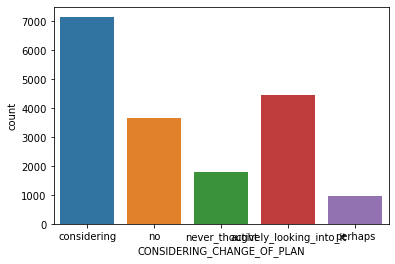

<Figure size 720x432 with 0 Axes>

In [6]:
sns.countplot(mobile['CONSIDERING_CHANGE_OF_PLAN'])

plt.figure(figsize = (10, 6))
plt.show()

In [3]:
mobile['CONSIDERING_CHANGE_OF_PLAN'] = mobile['CONSIDERING_CHANGE_OF_PLAN'].map({'never_thought': 1,
                                                                                 'no': 2,
                                                                                 'perhaps' :3,
                                                                                 'considering' :4,
                                                                                 'actively_looking_into_it' :5
                                                                                })

④ 기초통계량

In [4]:
print(mobile['CONSIDERING_CHANGE_OF_PLAN'].value_counts())
print(mobile['CONSIDERING_CHANGE_OF_PLAN'].value_counts()/ len(mobile['CONSIDERING_CHANGE_OF_PLAN']))

4    7141
5    4453
2    3644
1    1804
3     958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
4    0.396722
5    0.247389
2    0.202444
1    0.100222
3    0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


⑤ 분포

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


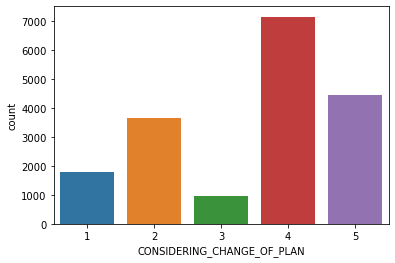

In [5]:
sns.countplot(mobile['CONSIDERING_CHANGE_OF_PLAN'])
plt.show()

In [ ]:
sns.countplot(mobile['CONSIDERING_CHANGE_OF_PLAN'])
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리

* 만족도 설문과 같이 여기도 절반이상이 불만족이다. 총 63%이다.
* 왜 다들 변경하고싶은건지 새로운 핸드폰 출시 때문인걸까?


⑦ 추가 분석해볼 사항 도출

* 변경 계획이 있는 사람들은 돈이 많을까?
* 변경 계획이 있는 사람들은 만족도도 역시 떨어질까?

### 7) CHURN(target)

① 변수의 비즈니스 의미
* 이탈 여부

② 숫자? 범주?
* 범주

③ 전처리 사항
* NaN 존재 X , 가변수화 X 

④ 기초통계량

In [46]:
print(mobile['CHURN'].value_counts())
print(mobile['CHURN'].value_counts()/ len(mobile['CHURN']))

0    9131
1    8869
Name: CHURN, dtype: int64
0    0.507278
1    0.492722
Name: CHURN, dtype: float64


⑤ 분포

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


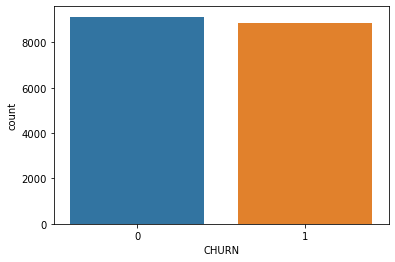

In [47]:
sns.countplot(mobile['CHURN'])
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리

* 만족도 설문과, 변경 계획에 비해 이탈여부는 크게 차이가 안난다.
    * 이탈은 안하고 새로운 핸드폰만 변경하는 것인가?
    * 만족도가 통신사 서비스보단 핸드폰의 불만족인가?

⑦ 추가 분석해볼 사항 도출

* 만족도와 변경계획과의 관계를 찾아봐야 좋을 것 같다.


## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) COLLEGE --> CHURN

① 교차표(pd.crosstab())

In [6]:
pd.crosstab(mobile['CHURN'], mobile['COLLEGE'])

COLLEGE,0,1
CHURN,,
0,4616,4515
1,4335,4534


② 시각화( Stacked Bar, Mosaic)

CHURN           0         1
COLLEGE                    
0        0.515697  0.484303
1        0.498950  0.501050


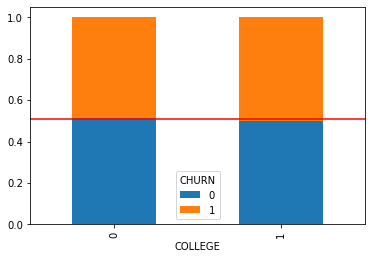

In [8]:
temp = pd.crosstab(mobile['COLLEGE'], mobile['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

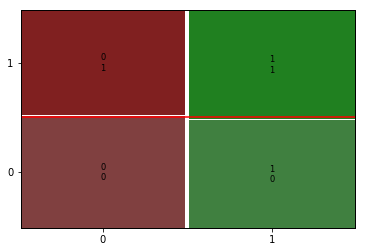

In [9]:
mosaic(mobile.sort_values(['COLLEGE', 'CHURN']), [ 'COLLEGE','CHURN'], gap = 0.01)
plt.axhline(1- mobile['CHURN'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용

>
* 대학졸업과 졸업하지 않은 사람들의 비율은 비슷하고, 이탈과 이탈하지않은 것이 비슷해 차이가 없는편이다.
* mosaic으로 봐도 평균과 별 차이가 있지 않고 동등한 수준이며 차이는 없다.
* 결론 : 대학졸업 여부와 고객 이탈은 상관이 없다.

③ 가설검정(카이제곱검정)

In [11]:

table = pd.crosstab(mobile['CHURN'],mobile['COLLEGE'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])
print('-' * 100)

result

교차표
 COLLEGE     0     1
CHURN              
0        4616  4515
1        4335  4534
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.982102934693503
p-value 0.025610833478220536
기대빈도
 [[4540.64338889 4590.35661111]
 [4410.35661111 4458.64338889]]
----------------------------------------------------------------------------------------------------


(4.982102934693503,
 0.025610833478220536,
 1,
 array([[4540.64338889, 4590.35661111],
        [4410.35661111, 4458.64338889]]))

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

>
* 자유도는 COLLEGE 범주 2개, CHURN 범주 2개 = > (2-1)*(2-1) = 1
* 카이제곱통계량은 자유도의 2~3배가 넘는다. 시각화에선 차이가 없는 줄 알았지만
  시각화의 한계로 가설검정을 통하여 보니 약간의 차이가 있다고 보여진다.
* p-value 값을 보아하니 0.02 < 0.05 이므로, 차이가 약간 있다고 본다.
* 기대빈도 차이가 약간 크다.

#### 2) REPORTED_SATISFACTION --> CHURN

① 교차표(pd.crosstab())

In [3]:
pd.crosstab(mobile['CHURN'], mobile['REPORTED_SATISFACTION'])

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,952,492,1792,2334,3543
1,854,440,1798,2228,3529


② 시각화( Stacked Bar, Mosaic)

In [4]:
mobile_test = mobile.copy()

# 결측치 확인
print(mobile_test.isna().sum())

COLLEGE                         0
INCOME                          0
OVERAGE                         0
LEFTOVER                        0
HOUSE                         215
HANDSET_PRICE                   0
AVERAGE_CALL_DURATION           0
REPORTED_SATISFACTION          38
CONSIDERING_CHANGE_OF_PLAN      0
CHURN                           0
dtype: int64


In [5]:
mobile_test.fillna(method = 'ffill', inplace = True)
mobile_test.head(7)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1
5,1,119591,0,43,231309.0,714,1,very_sat,considering,0
6,1,99548,235,0,238561.0,294,6,very_unsat,actively_looking_into_it,1


In [6]:
mobile_test['REPORTED_SATISFACTION'] = mobile_test['REPORTED_SATISFACTION'].map({'very_sat': 1,'sat': 2, 'avg' :3, 'unsat':4, 'very_unsat':5})

CHURN                         0         1
REPORTED_SATISFACTION                    
1                      0.511720  0.488280
2                      0.527331  0.472669
3                      0.527132  0.472868
4                      0.499305  0.500695
5                      0.500775  0.499225


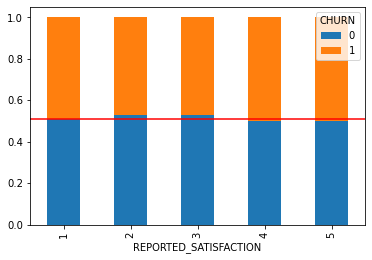

In [7]:
temp = pd.crosstab(mobile_test['REPORTED_SATISFACTION'], mobile_test['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile_test['CHURN'].mean(), color = 'r')
plt.show()

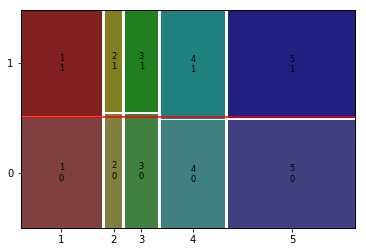

In [8]:
mosaic(mobile_test.sort_values(['REPORTED_SATISFACTION', 'CHURN']), [ 'REPORTED_SATISFACTION','CHURN'], gap = 0.01)
plt.axhline(1- mobile_test['CHURN'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용

>
* 만족과 평균에서 이탈이 평균보다 적은편이다.
* 매우 만족은 의외로 이탈이 평균이랑 비슷하여 차이가 없다.
* 만족 쪽은 오히려 평균으로 하나의 그래프로 나오고, 불만족은 오히려 잔류가 많은 그래프로 나오게하면 좋을 것 같다.
* 만족도와 초과 사용 시간을 비교해봐도 좋을 것 같다.

③ 가설검정(카이제곱검정)

In [19]:
# (data[target], data[feature]) 
table = pd.crosstab(mobile_test['CHURN'],mobile_test['REPORTED_SATISFACTION'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])
print('-' * 100)

result

교차표
 REPORTED_SATISFACTION  avg  sat  unsat  very_sat  very_unsat
CHURN                                                       
0                      952  492   1795      2336        3556
1                      854  441   1800      2229        3545
----------------------------------------------------------------------------------------------------
카이제곱통계량 6.825490904745855
p-value 0.1454026621271181
기대빈도
 [[ 916.14366667  473.29016667 1823.66361111 2315.72305556 3602.1795    ]
 [ 889.85633333  459.70983333 1771.33638889 2249.27694444 3498.8205    ]]
----------------------------------------------------------------------------------------------------


(6.825490904745855,
 0.1454026621271181,
 4,
 array([[ 916.14366667,  473.29016667, 1823.66361111, 2315.72305556,
         3602.1795    ],
        [ 889.85633333,  459.70983333, 1771.33638889, 2249.27694444,
         3498.8205    ]]))

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

>
* 자유도는 만족도 범주 5개, 이탈 2개 => (5-1)*(2-1) = 4
* 카이제곱통계량은 자유도의 2~3배가 되지 않으므로, 차이가 없다고 볼 수 있다.
* 시각화된 것과 같이 가설검정의 경우도 차이가 있지 않다고 본다.
* P-value의 값을 보니 0.14 > 0.05 이므로, 차이가 있지 않다.


#### 3)  CONSIDERING_CHANGE_OF_PLAN  --> CHURN

① 교차표(pd.crosstab())

In [20]:
pd.crosstab(mobile['CHURN'], mobile['CONSIDERING_CHANGE_OF_PLAN'])

CONSIDERING_CHANGE_OF_PLAN,1,2,3,4,5
CHURN,,,,,
0,926,1823,456,3648,2278
1,878,1821,502,3493,2175


② 시각화( Stacked Bar, Mosaic)

CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
1                           0.513304  0.486696
2                           0.500274  0.499726
3                           0.475992  0.524008
4                           0.510853  0.489147
5                           0.511565  0.488435


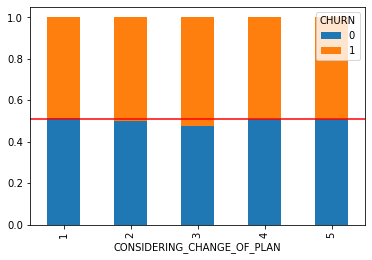

In [22]:
temp = pd.crosstab(mobile['CONSIDERING_CHANGE_OF_PLAN'], mobile['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

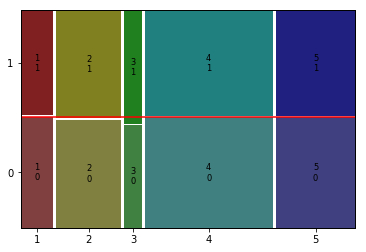

In [23]:
mosaic(mobile.sort_values(['CONSIDERING_CHANGE_OF_PLAN', 'CHURN']), [ 'CONSIDERING_CHANGE_OF_PLAN','CHURN'], gap = 0.01)
plt.axhline(1- mobile['CHURN'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용

>
* 만족도 설문과 같이 생각보다 이탈은 많지 않다.
* 변경 계획에서는 관련이 없는 편이다.

③ 가설검정(카이제곱검정)

In [24]:
# (data[target], data[feature]) 
table = pd.crosstab(mobile['CHURN'],mobile['CONSIDERING_CHANGE_OF_PLAN'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])
print('-' * 100)

result

교차표
 CONSIDERING_CHANGE_OF_PLAN    1     2    3     4     5
CHURN                                                 
0                           926  1823  456  3648  2278
1                           878  1821  502  3493  2175
----------------------------------------------------------------------------------------------------
카이제곱통계량 5.421434419620689
p-value 0.2467222586679969
기대빈도
 [[ 915.12911111 1848.52022222  485.97211111 3622.47061111 2258.90794444]
 [ 888.87088889 1795.47977778  472.02788889 3518.52938889 2194.09205556]]
----------------------------------------------------------------------------------------------------


(5.421434419620689,
 0.2467222586679969,
 4,
 array([[ 915.12911111, 1848.52022222,  485.97211111, 3622.47061111,
         2258.90794444],
        [ 888.87088889, 1795.47977778,  472.02788889, 3518.52938889,
         2194.09205556]]))

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

>
* 자유도는 변경계획 5개, 이탈 2개 => (5-1)*(2-) = 4
* 카이제곱통계량은 자유도보다 2~3배 크지 않으므로, 차이가 없다.
* p-value 또한, 0.24 > 0.05 차이가 없다.
* 시각화와 마찬가지로 차이가 없다

⑤ 추가분석
* 변경계확과 만족도설문의 조합으로 이탈여부 분석    

In [27]:
mobile.groupby(['CONSIDERING_CHANGE_OF_PLAN','REPORTED_SATISFACTION'],as_index=False)['CHURN'].mean()

,CONSIDERING_CHANGE_OF_PLAN,REPORTED_SATISFACTION,CHURN
0,actively_looking_into_it,avg,0.454158
1,actively_looking_into_it,sat,0.471861
2,actively_looking_into_it,unsat,0.482418
3,actively_looking_into_it,very_sat,0.507194
4,actively_looking_into_it,very_unsat,0.491299
5,considering,avg,0.461426
6,considering,sat,0.452316
7,considering,unsat,0.493581
8,considering,very_sat,0.481828
9,considering,very_unsat,0.502807


In [28]:
mobile['PLAN'] = '5' 
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] =='never_thought') & (mobile['REPORTED_SATISFACTION']=='very_sat'), 'PLAN'] = '1'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] =='never_thought') & (mobile['REPORTED_SATISFACTION']=='sat'), 'PLAN'] = '1'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] =='never_thought') & (mobile['REPORTED_SATISFACTION']=='avg'), 'PLAN'] = '1'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] =='never_thought') & (mobile['REPORTED_SATISFACTION']=='unsat'), 'PLAN'] = '2'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] =='never_thought') & (mobile['REPORTED_SATISFACTION']=='very_unsat'), 'PLAN'] = '2'

mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'no') & (mobile['REPORTED_SATISFACTION']=='very_sat'), 'PLAN'] = '1'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'no') & (mobile['REPORTED_SATISFACTION']=='sat'), 'PLAN'] = '1'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'no') & (mobile['REPORTED_SATISFACTION']=='avg'), 'PLAN'] = '1'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'no') & (mobile['REPORTED_SATISFACTION']=='unsat'), 'PLAN'] = '3'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'no') & (mobile['REPORTED_SATISFACTION']=='very_unsat'), 'PLAN'] = '3'

mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'perhaps') & (mobile['REPORTED_SATISFACTION']== 'very_sat'), 'PLAN'] = '2'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'perhaps') & (mobile['REPORTED_SATISFACTION']== 'sat'), 'PLAN'] = '2'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'perhaps') & (mobile['REPORTED_SATISFACTION']== 'avg'), 'PLAN'] = '2'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'perhaps') & (mobile['REPORTED_SATISFACTION']== 'unsat'), 'PLAN'] = '4'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'perhaps') & (mobile['REPORTED_SATISFACTION']== 'very_unsat'), 'PLAN'] = '4'

mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'considering') & (mobile['REPORTED_SATISFACTION']=='very_sat'), 'PLAN'] = '3'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'considering') & (mobile['REPORTED_SATISFACTION']=='sat'), 'PLAN'] = '3'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'considering') & (mobile['REPORTED_SATISFACTION']=='avg'), 'PLAN'] = '4'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'considering') & (mobile['REPORTED_SATISFACTION']=='very_unsat'), 'PLAN'] = '4'
mobile.loc[(mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'considering') & (mobile['REPORTED_SATISFACTION']=='unsat'), 'PLAN'] = '4'



mobile.sort_values(by='INCOME', ascending=False).head(15)
# mobile.head(15)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN,RICH,PLAN
9092,0,159983,49,19,581215.0,748,6,very_sat,no,0,A,1
13298,0,159954,26,24,299070.0,804,1,very_unsat,considering,0,A,4
17302,0,159945,188,0,169027.0,569,11,unsat,actively_looking_into_it,1,A,5
5019,0,159944,199,11,986345.0,899,6,very_unsat,perhaps,1,A,4
13532,0,159941,77,8,382517.0,801,4,very_sat,actively_looking_into_it,1,A,5
15734,0,159938,59,61,363388.0,870,1,avg,considering,1,A,4
2301,0,159934,165,14,290209.0,778,5,sat,never_thought,1,A,1
10070,0,159934,0,77,510251.0,727,8,unsat,no,1,A,3
8074,1,159932,163,77,316025.0,835,1,avg,never_thought,1,A,1
4833,1,159912,165,79,482981.0,624,1,very_sat,never_thought,1,A,1


* 바꾸지 않을 확률이 90퍼 이상인 고객들은 1, 바꾸지않을 확률이 70퍼 이상은 2를 사용 하였고, 
* 바꿀 가능성이 적은 고객은 3, 많은 고객들은 4,5를 사용 하였다.

In [37]:
mobile.loc[(mobile['PLAN'] == '1')].head(30)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN,RICH,PLAN
7,1,63338,50,57,394791.0,362,1,sat,no,0,D,1
12,1,31749,51,0,388298.0,220,2,very_sat,no,1,F,1
21,1,151060,23,55,356870.0,517,1,avg,no,1,A,1
24,0,144913,0,15,310943.0,768,6,avg,no,0,A,1
38,0,129806,0,15,345692.0,498,6,very_sat,never_thought,0,B,1
59,0,78777,32,87,667417.0,265,2,sat,no,0,D,1
66,1,49046,74,37,619694.0,221,2,avg,no,0,E,1
71,0,136220,90,58,171255.0,471,1,sat,no,1,A,1
88,1,64777,0,8,720317.0,289,6,very_sat,never_thought,0,D,1
97,0,136803,174,23,437576.0,143,5,avg,no,1,A,1


### (2) 숫자형 Feature --> CHURN

#### 1) OVERAGE --> CHURN


① 그래프 : histogram, densityplot

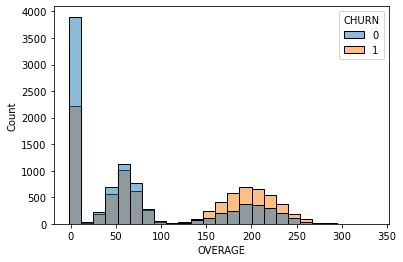

In [25]:
sns.histplot(x='OVERAGE', data = mobile, hue = 'CHURN')

plt.show()

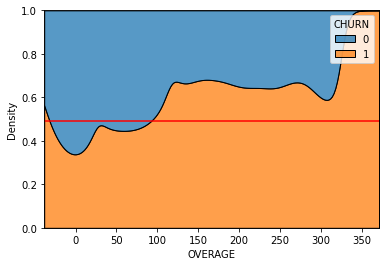

In [25]:
sns.kdeplot(x='OVERAGE', data = mobile, hue ='CHURN'
            , multiple = 'fill')
plt.axhline(mobile['CHURN'].mean(), color = 'r')
plt.show()

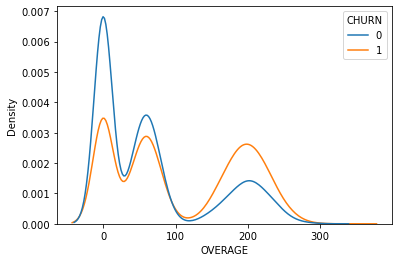

In [26]:
sns.kdeplot(x='OVERAGE', data = mobile, hue ='CHURN')
plt.show()

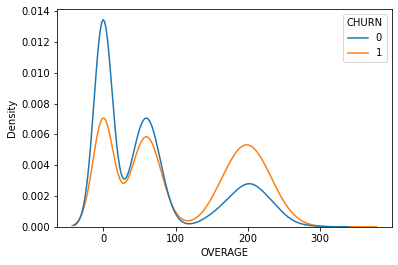

In [27]:
sns.kdeplot(x='OVERAGE', data = mobile, hue ='CHURN', common_norm = False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 
* hist로 보면, 초과사용은 초반에 밀집 되어있다.
    * 초반에 밀집되어 있는것으로 보아 모르고 사용하다가 초과 된 것으로 보인다.
    * 초과 사용하면 알림이 가므로 조금이라도 초과 한 것이 나타난 것이다.
* 초과한 시간이 많을 수록 이탈도 증가하게 된다.
* 왜 초과를 많이 통신사를 이탈을 할까?
    * 요금제가 비싼 통신사 인가?
    * 결합 할인이 있는 건가?
* 0-20, 30-100, 100-250 이렇게 나누어서 통계해도 좋을 것 같다.
* dens 그래프를 보면 차이가 조금 있는 것으로 보인다.

② 수치화 : 로지스틱회귀

In [29]:
model = sm.Logit(mobile['CHURN'], mobile['OVERAGE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 
* p-value 값이 0에 가까운수로 관련이 있다. 
* 시각화에서도 차이가 있는 것 처럼 수치화에서도 관련이 있다.
* 근데 부분 부분 분포가 있는 것으로 보아 새롭게 추가적인 분석을 해야할 필요가 있다.

* 구간별로 나누어서 분석이 필요한 것으로 보인다.

#### 2) HANDSET_PRICE --> CHURN


① 그래프 : histogram, densityplot

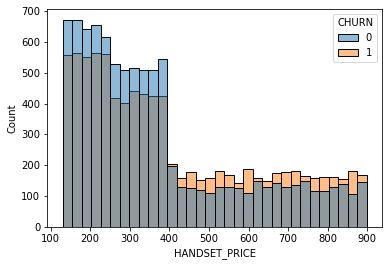

In [20]:
sns.histplot(x='HANDSET_PRICE', data = mobile, hue = 'CHURN')

plt.show()

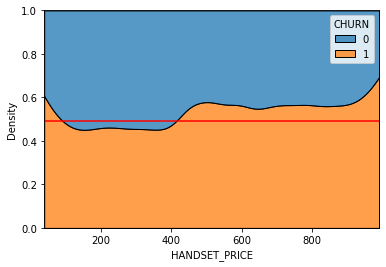

In [21]:
sns.kdeplot(x='HANDSET_PRICE', data = mobile, hue ='CHURN'
            , multiple = 'fill')
plt.axhline(mobile['CHURN'].mean(), color = 'r')
plt.show()

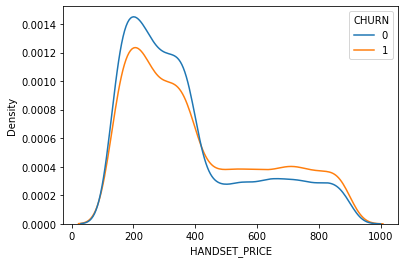

In [22]:
sns.kdeplot(x='HANDSET_PRICE', data = mobile, hue ='CHURN', )
plt.show()

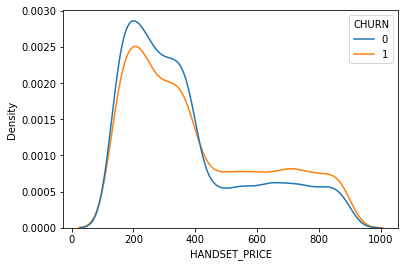

In [23]:
sns.kdeplot(x='HANDSET_PRICE', data = mobile, hue ='CHURN', common_norm = False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

>
* 핸드폰 가격이 100-400 까지는 잔류가 높다.
    * 핸드폰을 바꿀 때, 통신사에서 지원금을 주나?
    * 왜 100-400에서 잔류가 왜 높을까?
* 연 수입액이 적은만큼 값이 싼 핸드폰을 사용할까?
* 반대로, 400이상은 이탈율보다 잔여가 낮다.
    


② 수치화 : 로지스틱회귀

In [33]:
model = sm.Logit(mobile['CHURN'], mobile['HANDSET_PRICE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

>
* p-value 값이 0.0001 < 0.05 이므로, 0에 수렴하여 많은 차이가 있다.
* 시각화에서 차이가 있는 것 처럼 역시나 수치화에서도 차이가 있다.
* 연 수입액과 핸드폰 가격은 동일 한 그래프가 나올 것인가?
* dens 그래프를 보면, 거의 차이가 없어보이는 것으로 보인다.
  (조금만 더 올라가면 귀무가설이 참으로 보일 수 가 있다.)


#### 3) INCOME --> CHURN


① 그래프 : histogram, densityplot

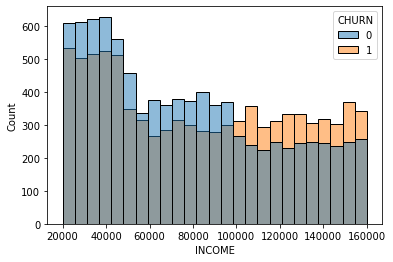

In [40]:
sns.histplot(x='INCOME', data = mobile, hue = 'CHURN')

plt.show()

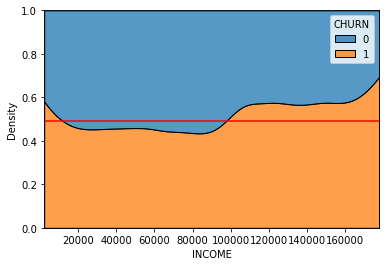

In [24]:
sns.kdeplot(x='INCOME', data = mobile, hue ='CHURN'
            , multiple = 'fill')
plt.axhline(mobile['CHURN'].mean(), color = 'r')
plt.show()

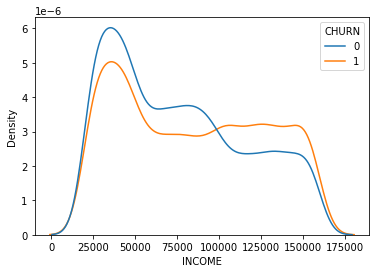

In [41]:
sns.kdeplot(x='INCOME', data = mobile, hue ='CHURN')
plt.show()

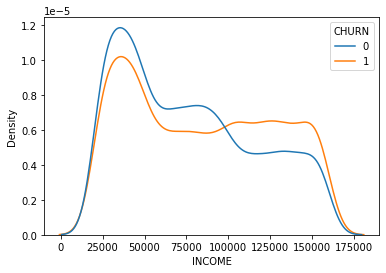

In [42]:
sns.kdeplot(x='INCOME', data = mobile, hue ='CHURN', common_norm = False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

>
* 연 수입액이 평균에서 적은 쪽은 이탈률이 적고, 많은 쪽은 이탈률이 많다.
    * 왜 수입액이 많으면 이탈이 많아질까?
* dens 그래프에서도 비슷 하게 나와 차이가 있을 것으로 보인다.


② 수치화 : 로지스틱회귀

In [37]:
model = sm.Logit(mobile['CHURN'], mobile['INCOME'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

>
* p-value의 값이 0에 수렴하므로, 큰 관련이 있다.
* 시각화 수치호 모두 같은 결과이다.
* 연 수입액이 많으면 비싼 핸드폰을 쓸지 궁금하다.
* 연 수입액이 많으면 만족도도 높을 것인가?

⑤ 추가분석
* 핸드폰가격과 연 수입액의 조합으로 이탈여부 분석
    

In [18]:
mobile.groupby(['HANDSET_PRICE','INCOME'],as_index=False)['CHURN'].mean()

,HANDSET_PRICE,INCOME,CHURN
0,130,20684,1.0
1,130,20755,1.0
2,130,21029,0.0
3,130,21285,0.0
4,130,21666,0.0
...,...,...,...
17991,899,144306,1.0
17992,899,150712,1.0
17993,899,152249,1.0
17994,899,153303,0.0


In [20]:
# mobile['RICH'] = 'G' 
# mobile.loc[(mobile['HANDSET_PRICE'] >= 100 )& (mobile['INCOME']> 10000) &(mobile['INCOME']<= 40000), 'RICH'] = 'F' 
# mobile.loc[(mobile['HANDSET_PRICE'] <= 400 )& (mobile['INCOME']> 40000) &(mobile['INCOME']<= 60000), 'RICH'] = 'E' 
# mobile.loc[(mobile['HANDSET_PRICE'] <= 600 )& (mobile['INCOME']> 60000) &(mobile['INCOME']<= 90000), 'RICH'] = 'D' 
# mobile.loc[(mobile['HANDSET_PRICE'] <= 700 )& (mobile['INCOME']> 90000) &(mobile['INCOME']<= 100000), 'RICH'] = 'C' 
# mobile.loc[(mobile['HANDSET_PRICE'] <= 800 )& (mobile['INCOME']> 100000) &(mobile['INCOME']<= 130000), 'RICH'] = 'B' 
# mobile.loc[(mobile['HANDSET_PRICE'] <= 900 )& (mobile['INCOME']> 130000) &(mobile['INCOME']<= 160000) , 'RICH'] = 'A' 


# mobile.sort_values(by='INCOME', ascending=False).head(15)
# mobile.head(15)

In [21]:
mobile['RICH'] = 'G' 

mobile.loc[(mobile['HANDSET_PRICE'] <= 900 )& (mobile['INCOME']> 130000) &(mobile['INCOME']<= 160000) , 'RICH'] = 'A'
mobile.loc[(mobile['HANDSET_PRICE'] <= 800 )& (mobile['INCOME']> 100000) &(mobile['INCOME']<= 130000), 'RICH'] = 'B' 
mobile.loc[(mobile['HANDSET_PRICE'] <= 700 )& (mobile['INCOME']> 90000) &(mobile['INCOME']<= 100000), 'RICH'] = 'C'
mobile.loc[(mobile['HANDSET_PRICE'] <= 400 )& (mobile['INCOME']> 40000) &(mobile['INCOME']<= 60000), 'RICH'] = 'E' 
mobile.loc[(mobile['HANDSET_PRICE'] <= 600 )& (mobile['INCOME']> 60000) &(mobile['INCOME']<= 90000), 'RICH'] = 'D' 
mobile.loc[(mobile['HANDSET_PRICE'] <= 400 )& (mobile['INCOME']> 40000) &(mobile['INCOME']<= 60000), 'RICH'] = 'E' 
mobile.loc[(mobile['HANDSET_PRICE'] >= 100 )& (mobile['INCOME']> 10000) &(mobile['INCOME']<= 40000), 'RICH'] = 'F' 



mobile.sort_values(by='CHURN', ascending=False).head(15)
# mobile.head(15)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN,RICH
9000,1,86280,178,16,155342.0,309,6,unsat,no,1,D
9969,1,35998,0,40,355556.0,264,1,very_sat,no,1,F
9953,0,108996,0,0,238746.0,462,9,very_sat,never_thought,1,B
9957,1,153073,221,9,436838.0,477,6,very_sat,no,1,A
9958,0,71014,49,24,181700.0,305,13,avg,actively_looking_into_it,1,D
9959,0,40965,64,17,205210.0,206,6,very_unsat,actively_looking_into_it,1,E
9961,1,44302,98,37,216422.0,136,2,unsat,perhaps,1,E
9963,1,44677,0,0,974077.0,244,9,very_unsat,considering,1,E
9965,1,94561,214,69,295788.0,335,1,very_unsat,considering,1,C
9966,0,130338,66,8,245080.0,556,4,very_sat,no,1,A


In [22]:
mobile.loc[(mobile['RICH'] == 'A')].head(30)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN,RICH
2,1,150419,0,14,204004.0,682,6,unsat,considering,0,A
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0,A
8,1,133496,163,11,166179.0,864,5,NaN,actively_looking_into_it,1,A
9,1,155145,29,18,717451.0,671,4,unsat,considering,0,A
21,1,151060,23,55,356870.0,517,1,avg,no,1,A
24,0,144913,0,15,310943.0,768,6,avg,no,0,A
27,1,144316,66,6,650622.0,673,4,very_unsat,no,0,A
40,1,140116,158,22,382210.0,405,14,very_sat,considering,1,A
41,1,149029,0,18,677583.0,837,5,very_unsat,no,0,A
44,1,134697,0,0,370297.0,454,2,very_unsat,considering,1,A


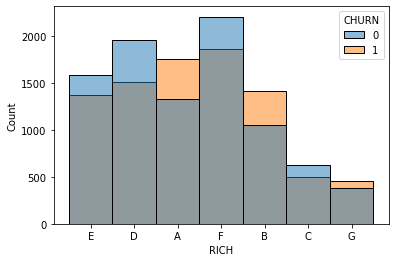

In [23]:
sns.histplot(x='RICH', data = mobile, hue = 'CHURN')

plt.show()

In [22]:
print(np.mean(mobile, axis = 0))

COLLEGE                       0.502722
INCOME                    80314.400278
OVERAGE                      86.014833
LEFTOVER                     23.995500
HOUSE                    492950.532696
HANDSET_PRICE               390.096667
AVERAGE_CALL_DURATION         5.990944
CHURN                         0.492722
dtype: float64


* 돈이 많고, 핸드폰을 비싼 것을 써도 만족하지는 않는 편이다.
* 하지만, 밑에 결과와 같이 연봉과 싼 휴대폰을 쓸 경우가 이탈률이 높았다.

#### 4) feature --> CHURN


## 4.관계 정리

### 1) 강한관계의 변수

In [ ]:
INCOME, HANDSET_PRICE , OVERAGE

### 2) 약한관계의 변수

In [ ]:
COLLEGE

### 3) 관계 없음

In [ ]:
CONSIDERING_CHANGE_OF_PLAN , REPORTED_SATISFACTION